In [1]:
import pandas as pd, matplotlib.pyplot as plt
import os, datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import Preprocess

In [2]:
# get the building type and color code
def setCategories(col_num):
        if col_num < 3:
            return "Academic Building", "lightcoral"
        if col_num < 8:
            return "North Residential Hall", "mediumpurple"
        else:
            return "South Residential Hall", "cornflowerblue"

# Plot by dorm
def plot_by_dorm(data, data2, col_num, fontsize = 15, margin = 10):
    # get color code and building type
    set_label, set_color = setCategories(col_num)
    
    #plot bar figure
    fig = plt.figure(figsize=(15, 10))
    
    #plot data
    plt.plot(data.index, data, label = set_label, color = set_color, linewidth= 0.4)
    plt.fill_between(data.index, data, 0, color = set_color, linewidth= 0.1)
    
    #plot prediction
    plt.plot(data2.index, data2, label = set_label, color = 'orange', linewidth= 0.4)
    plt.fill_between(data2.index, data2, 0, color = 'orange', linewidth= 0.1)
    
    plt.xlabel("Year", fontsize=fontsize)
    plt.ylabel("kWh", fontsize=fontsize)
    plt.title(data.name, fontsize=fontsize+5)
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.tick_params(axis='y', labelsize=fontsize)
    
    # show every year on x_axis
    plt.gca().xaxis.set_major_locator(mdate.YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()           
    
    plt.legend(loc = "upper right")    # show building type in legend
    plt.savefig(f"./Graphs/Building_Predict/{data.name}_Electrical.png")
    return fig

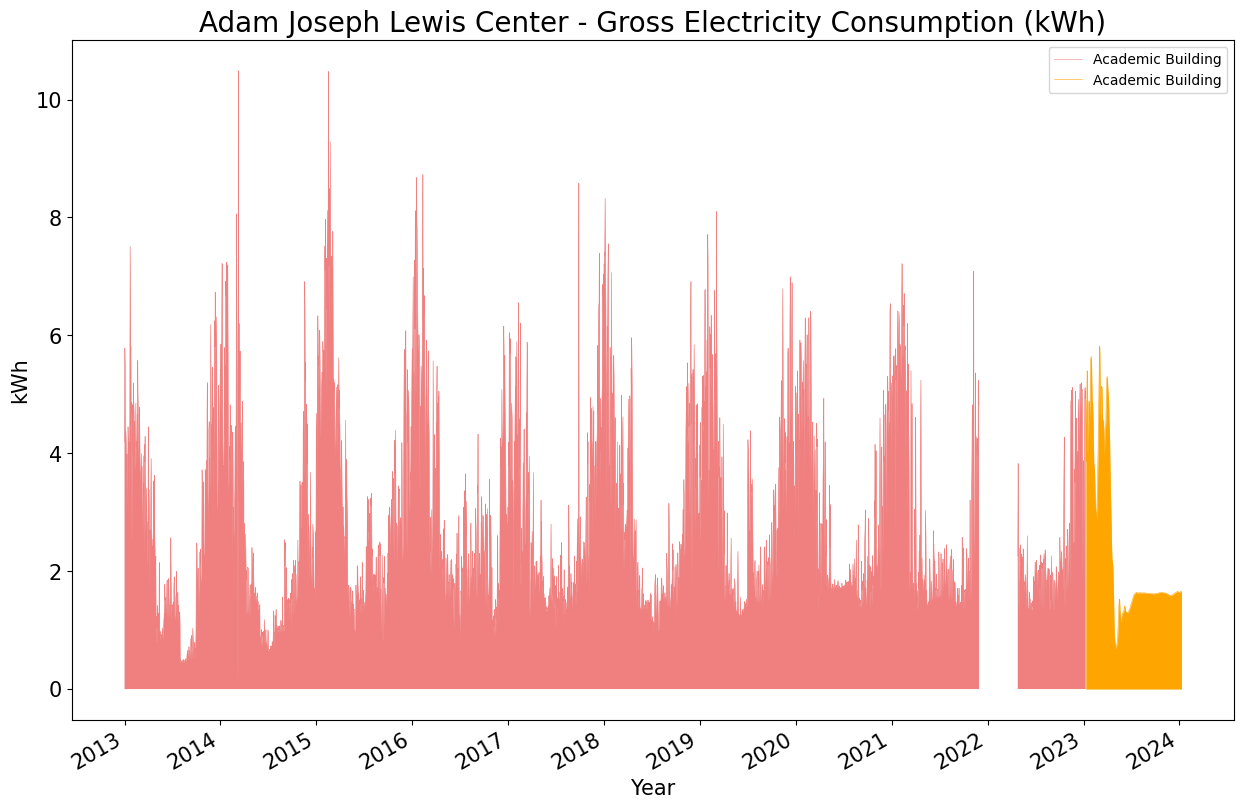

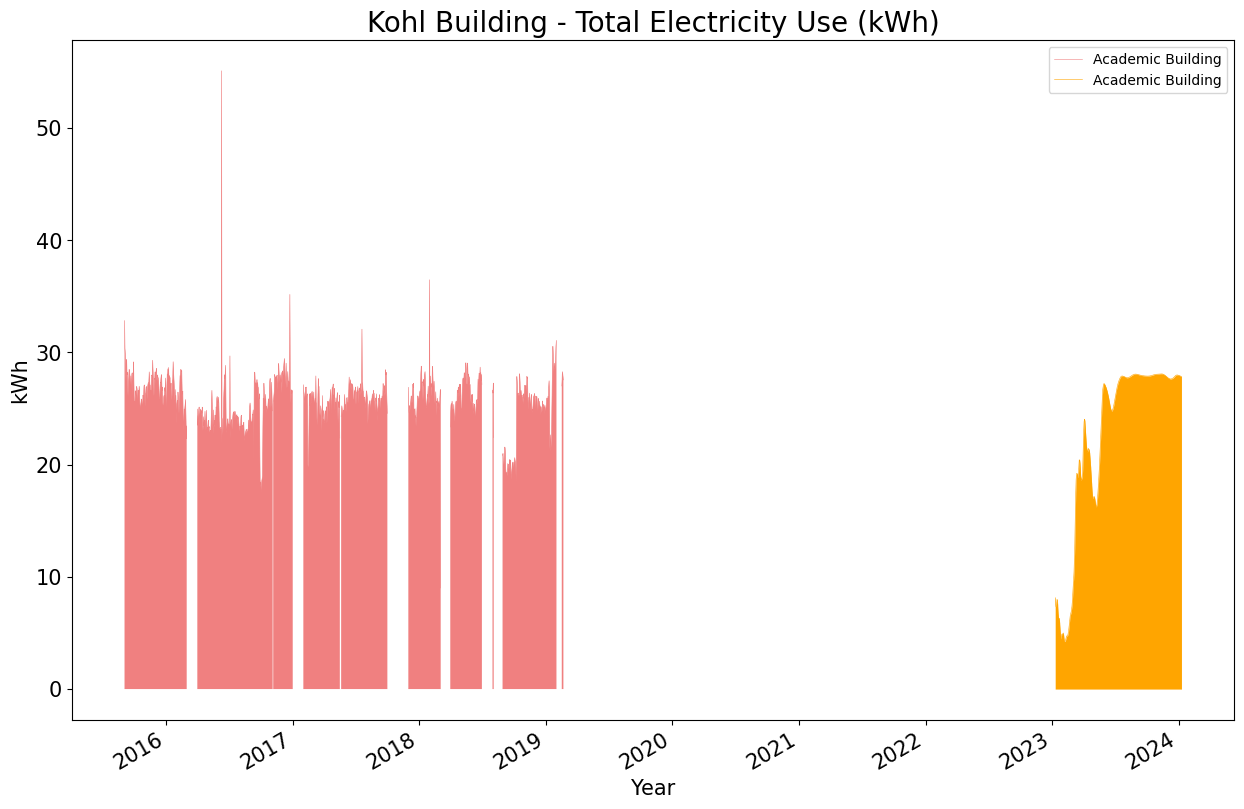

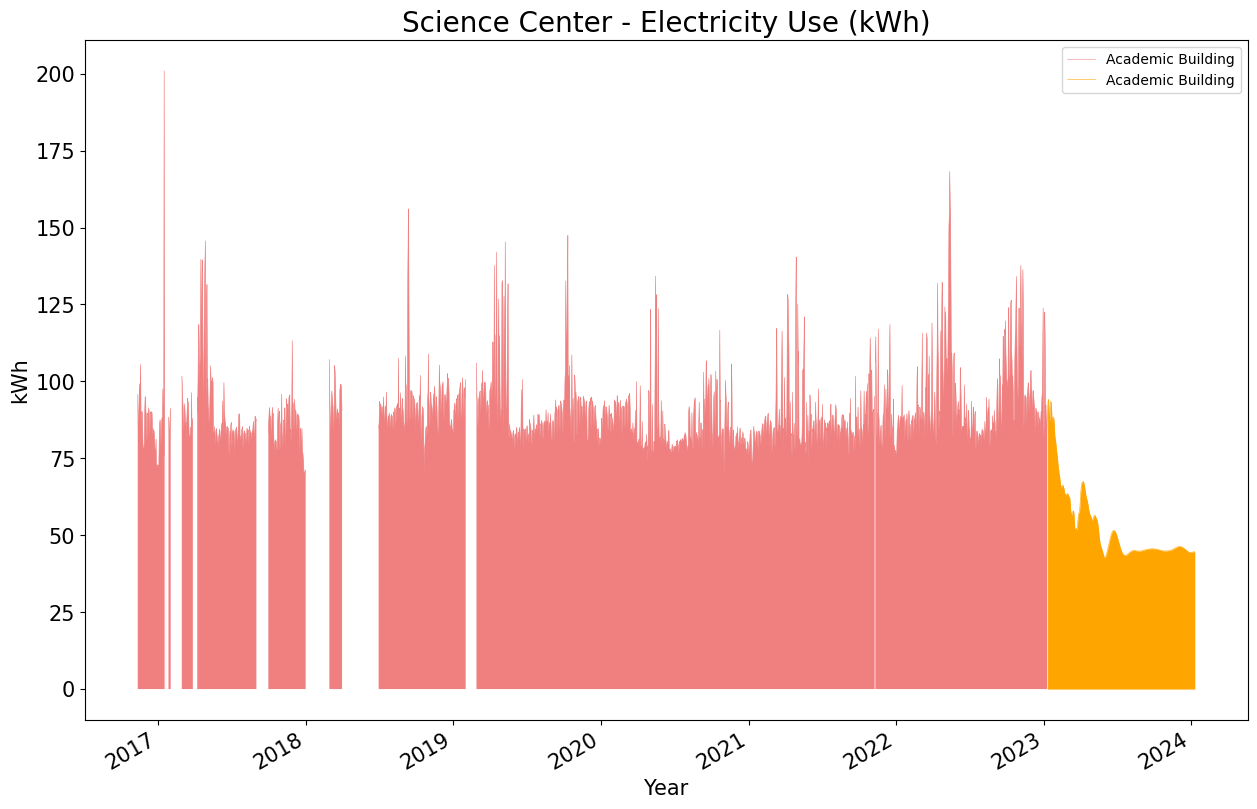

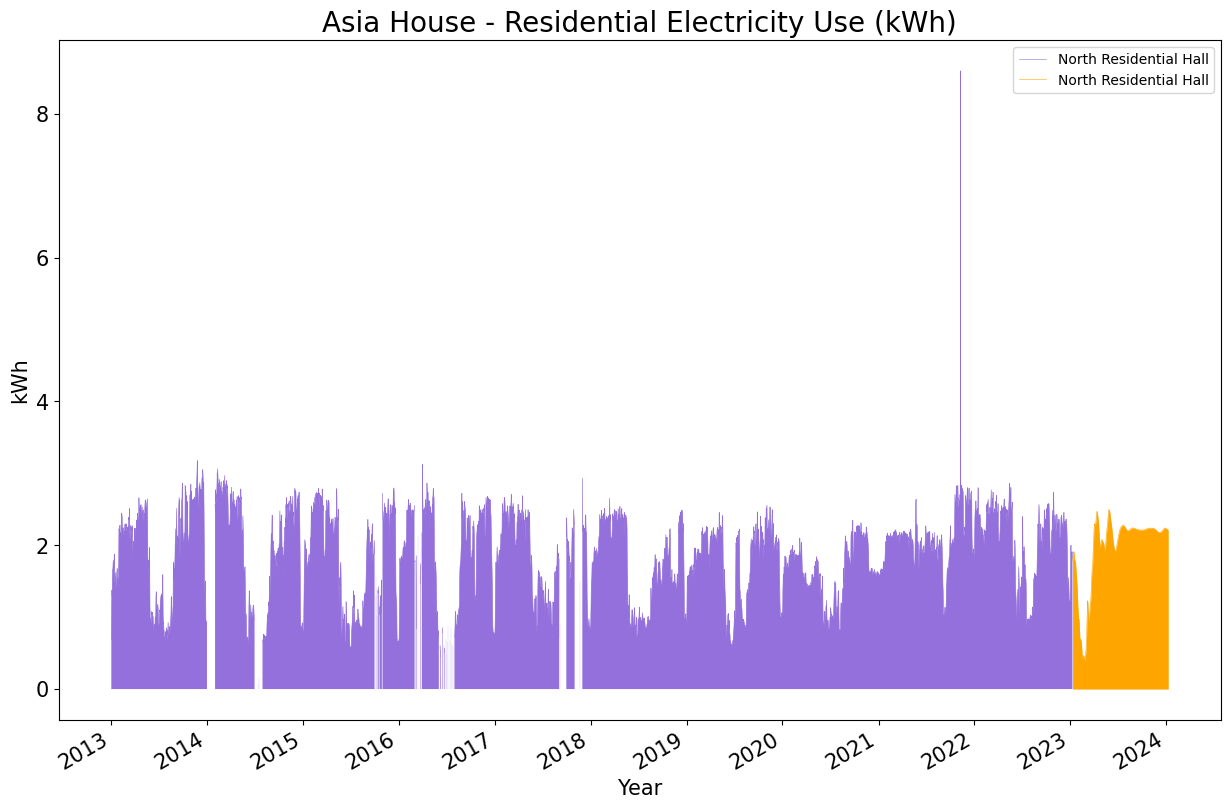

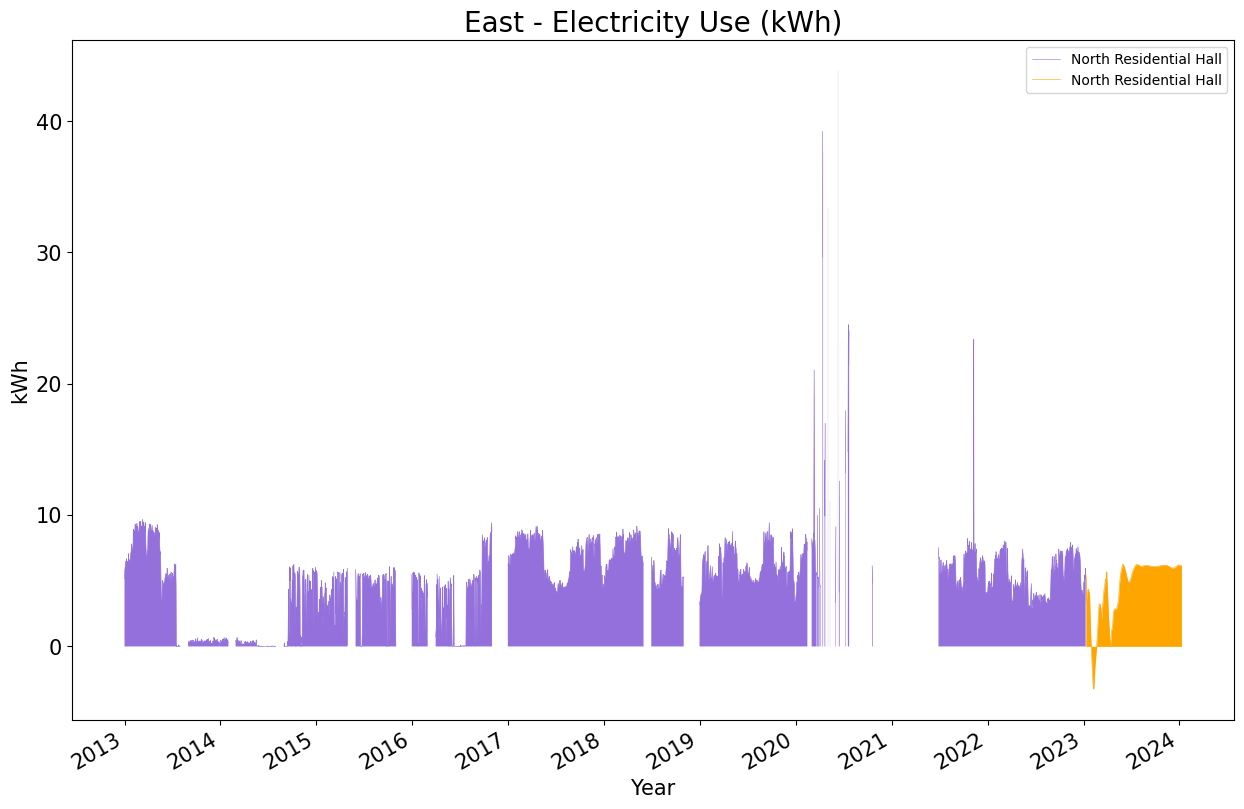

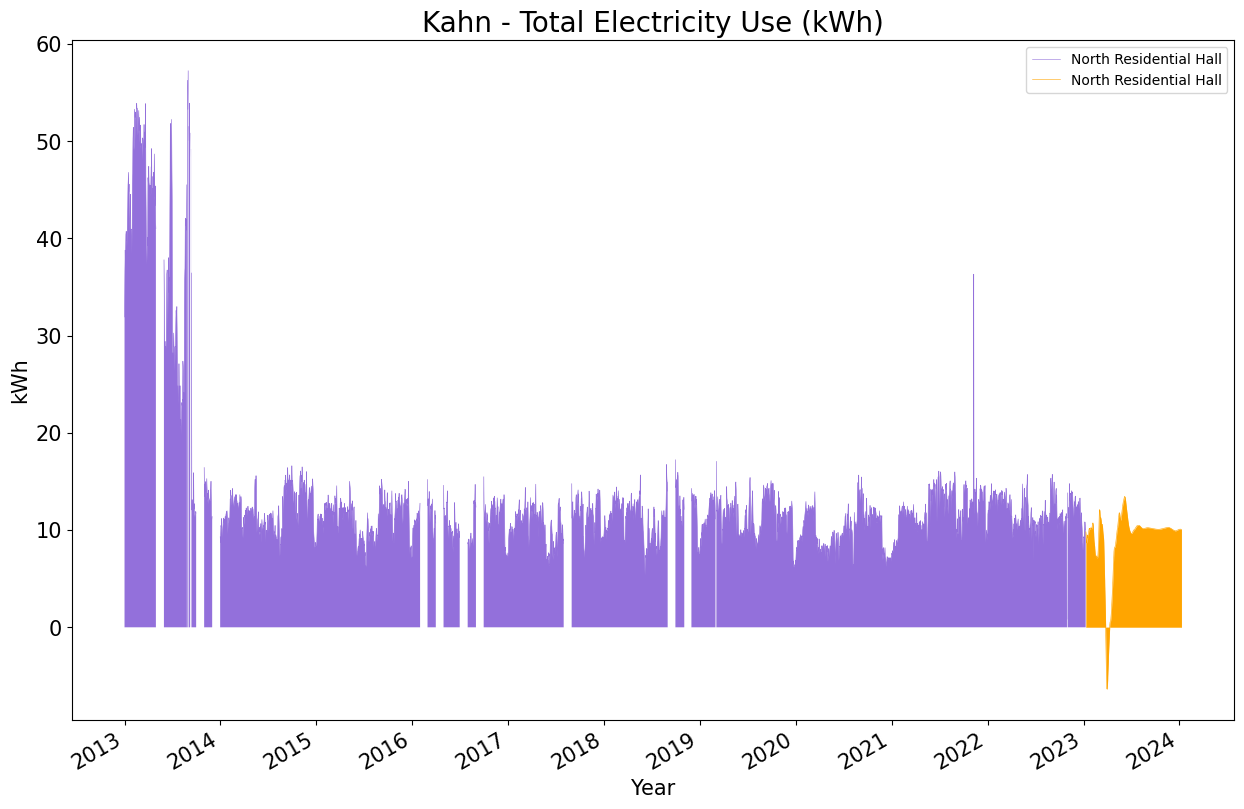

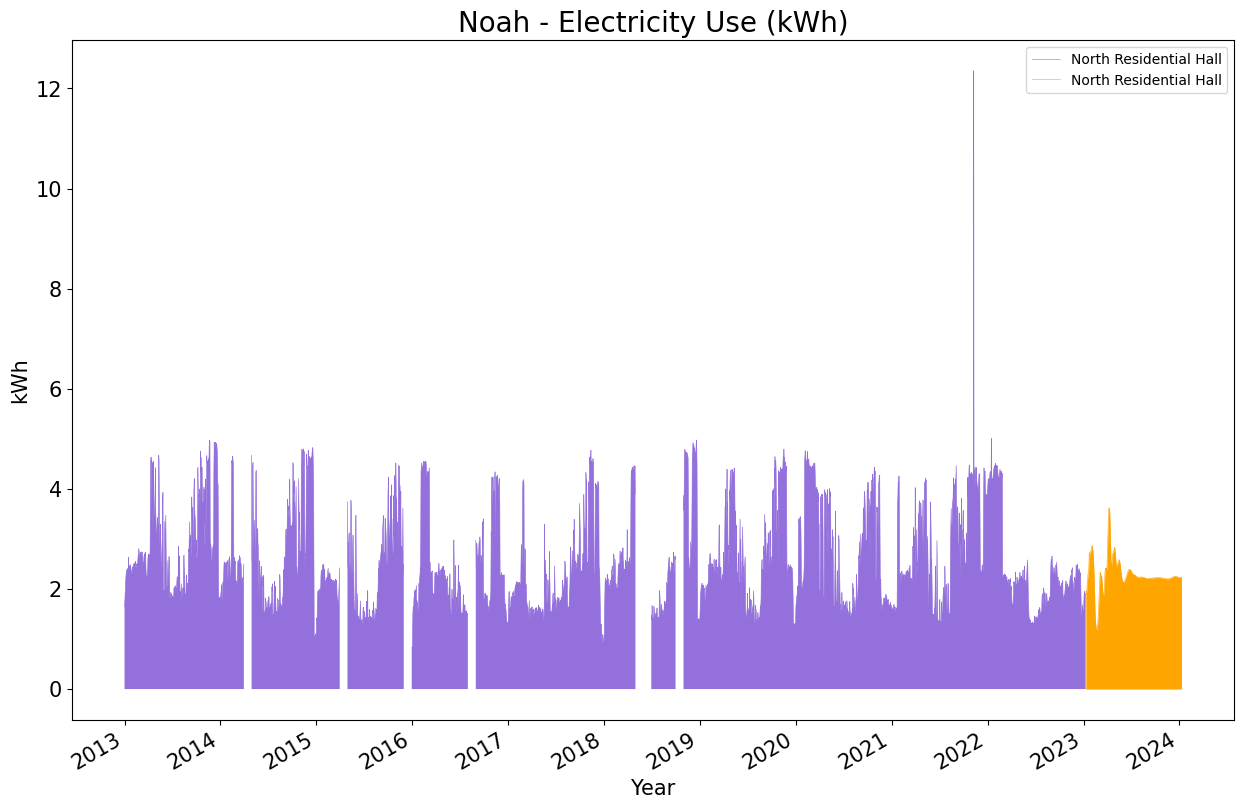

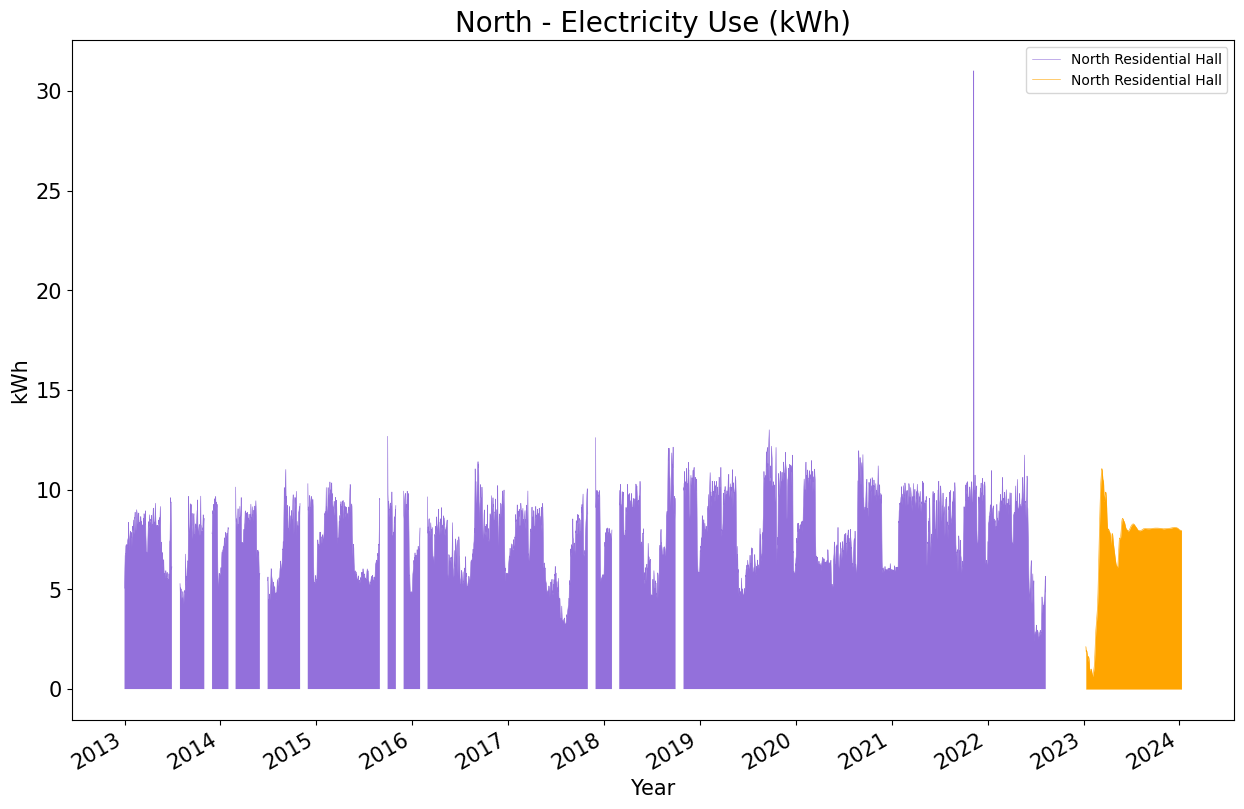

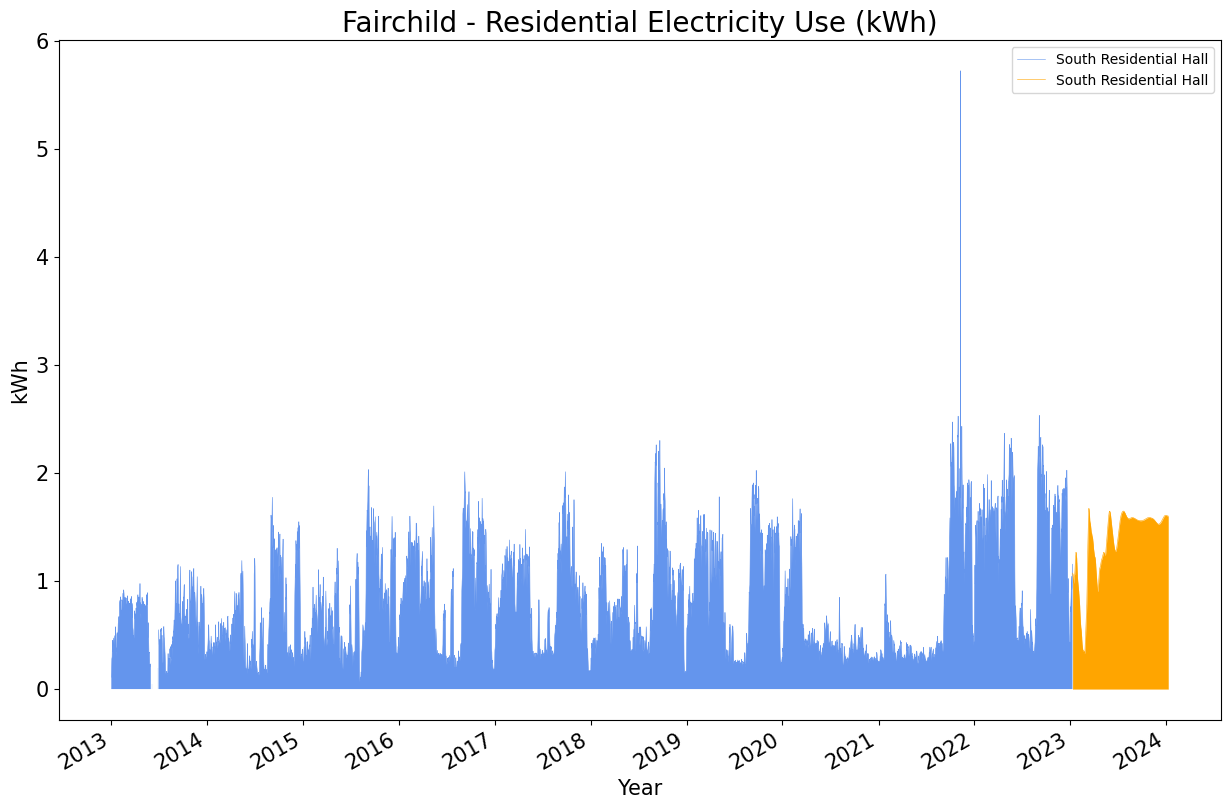

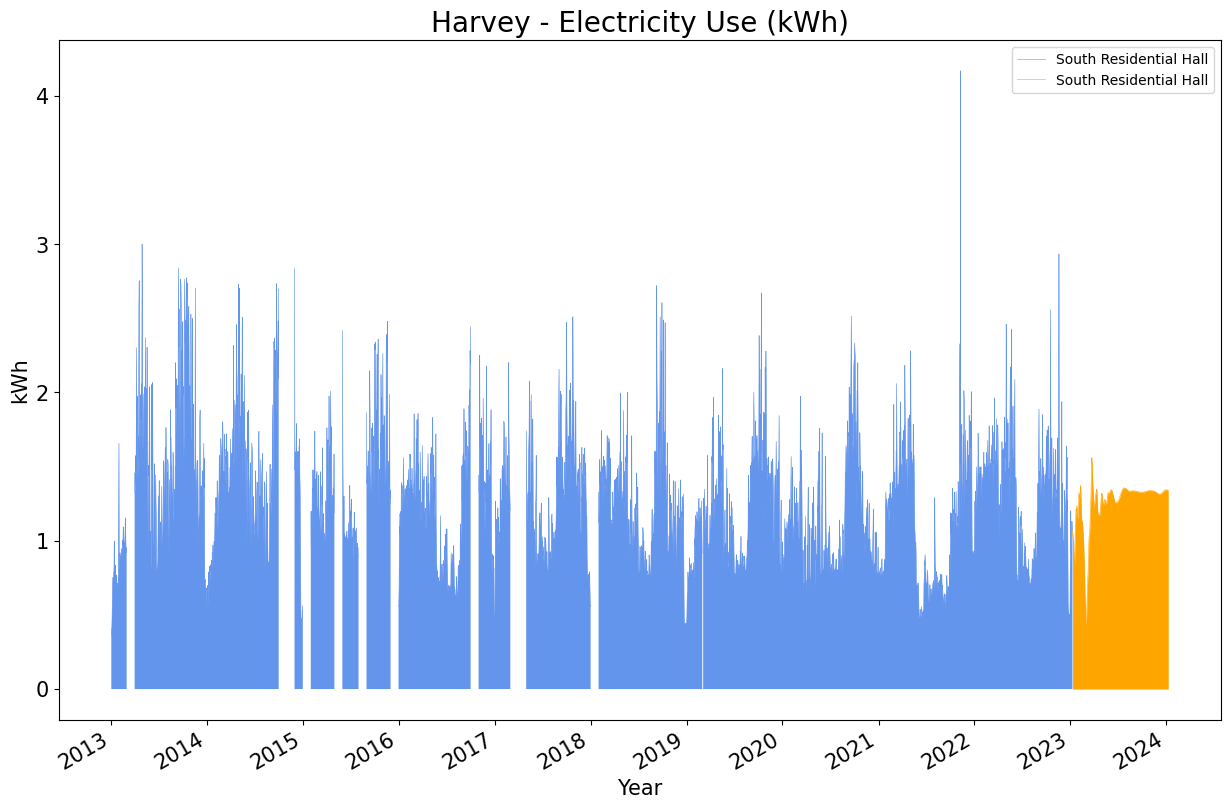

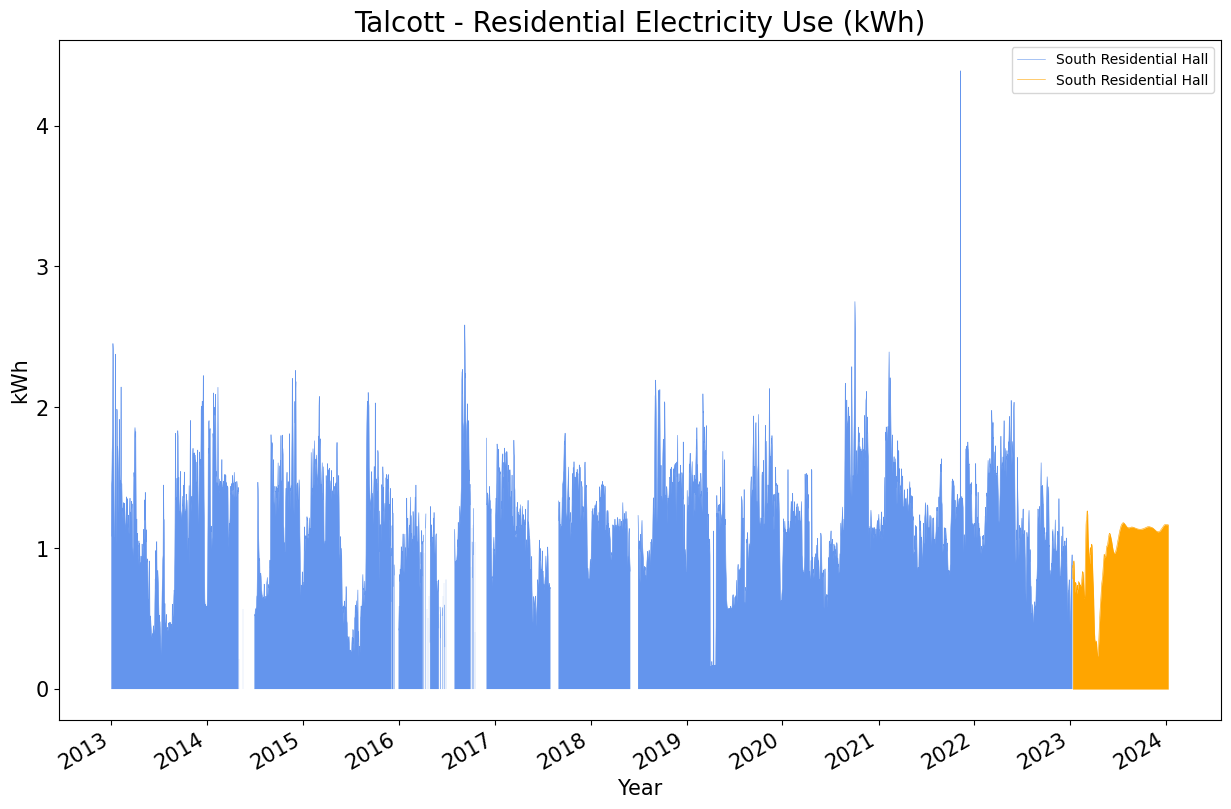

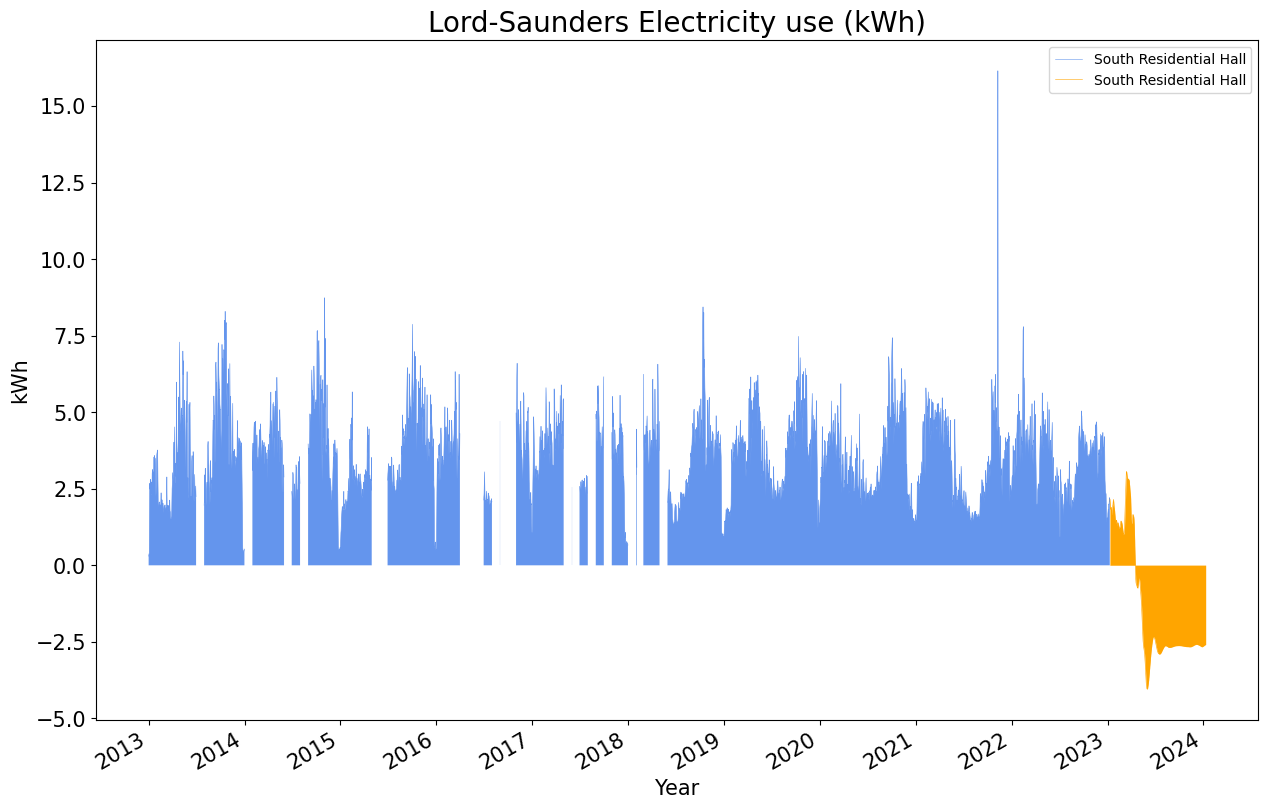

In [3]:
data = pd.read_csv("Data/Electrical_Averaged.csv")
data["Timestamp"] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)
dorm_data = Preprocess.remove_outliers(data, 15)

dorm2 = pd.read_csv("Data/Electrical_Predict.csv")
dorm2["Timestamp"] = pd.to_datetime(dorm2['Timestamp'])
dorm2.set_index('Timestamp', inplace=True)

#   Plot all dorms
for col_num in range(len(dorm_data.columns)):
    plot_by_dorm(dorm_data[dorm_data.columns[col_num]], dorm2[dorm2.columns[col_num]], col_num)